In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.feature_names[0:5]

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4']

In [5]:
digits.frame

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 432x288 with 0 Axes>

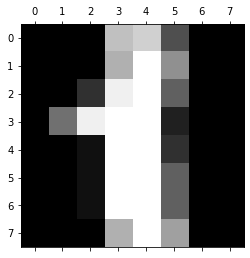

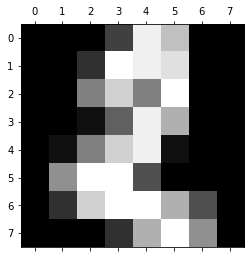

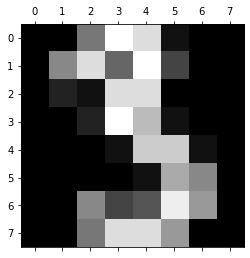

In [8]:
plt.gray() 
plt.matshow(digits.images[1])
plt.matshow(digits.images[2])
plt.matshow(digits.images[3])

These each value denotes color as a number darker -> 0 and brighter a high value. They when plotted gives a digit on plt.gray()

In [9]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)
modeldefault = LogisticRegression() #by defaut 100 shows fail to converge

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.1)

In [13]:
modeldefault.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [15]:
modeldefault.score(X_test, y_test)

0.9722222222222222

In [16]:
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
modeldefault.predict(digits.data[0:10])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<h4 style='color:purple'>Confusion Matrix</h4>

In [20]:
y_predicted = modeldefault.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 22,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 15,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0, 15]], dtype=int64)

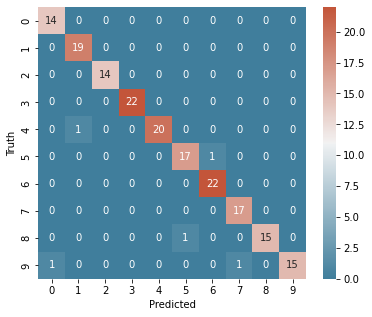

In [23]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(6,5))
cmap = sb.diverging_palette(230,20,as_cmap=True)
sb.heatmap(cm,annot=True,cmap=cmap)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# observations i made

as max iter increases it shows slight increase in accuracy